# Programming assigment 3

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Part 1 (max. 2 pts)  
1. Train a decision tree on subjected data. Use Python scikit-learn (this is up to you) classification tree fit it in to the data. 
2. Show the tree and enumerate its training accuracy. 
3. How would you interpret this model? Which gene is crucial for the decision? 
4. Is this gene really the one causing the cancer? Look up in the article Golub et al., 1999. 
5. Estimate real accuracy of the tree. Use e.g., crossvalidation (alternatively, you can split the data). 
6. Compare it with the training accuracy. 

In [27]:
X = pd.read_csv("gene_expression.csv", header=None, sep=";")
# get number from string with format 3,8
X = X.apply(lambda col: col.astype(str).str.replace(",", ".").astype(float))


y = pd.read_csv("label.csv", header=None).values.ravel()
# get classes 0 and 1 from 1 and 2
y = y - 1

with open("geneNames.txt") as f:
    gene_names = [line.strip() for line in f]

# print(X.head())
# print(y)
# print(gene_names[90:100])
print("X shape:", X.shape)
print("y shape:", y.shape)
print("gene_names length:", len(gene_names))


X shape: (72, 7129)
y shape: (72,)
gene_names length: 7129


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

train_acc = accuracy_score(y_train, tree.predict(X_train))
print(f"Training accuracy: {train_acc:.4f}")

test_acc = accuracy_score(y_test, tree.predict(X_test))
print(f"Test accuracy: {test_acc:.4f}")

Train samples: 64, Test samples: 8
Training accuracy: 1.0000
Test accuracy: 0.8750


In [29]:
# cross validation
scores = cross_val_score(tree, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Std deviation: {scores.std():.4f}")


Cross-validation scores: [0.8        0.73333333 0.71428571 0.85714286 0.71428571]
Mean accuracy: 0.7638
Std deviation: 0.0563


In [30]:
importances = tree.feature_importances_
top_feature = np.argmax(importances)
print(gene_names[top_feature])

ZYX


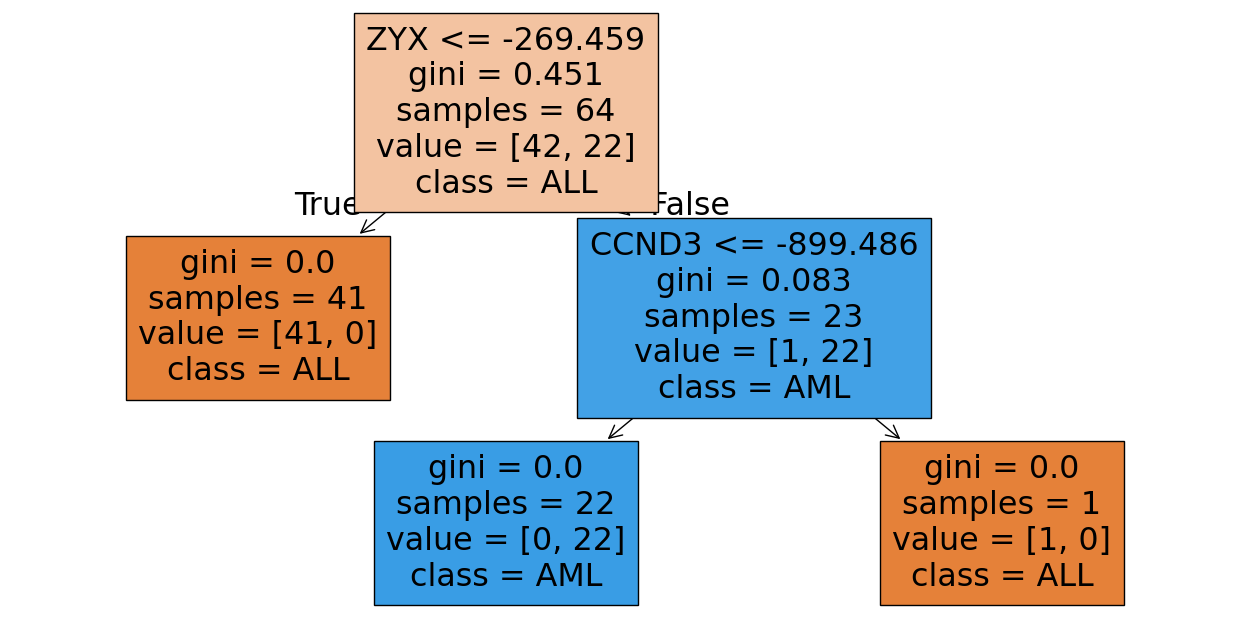

In [32]:
plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=gene_names, class_names=["ALL", "AML"], filled=True)
plt.show()

### Interpretation

- Rozhodovací strom byl omezen na **maximální hloubku 3**, protože při vyšší hloubce vykazoval známky **přeučení (overfittingu)**. Přesnost se po tomto omezení nezměnila ani u testovací, ani u trénovací sady.
- Přesto model zůstává částečně přeučený – **trénovací přesnost je 1.00**, zatímco:
  - **testovací přesnost**: 0.87  
  - **průměrná přesnost při 5-fold cross-validaci**: 0.76 (±0.06)
- Strom k rozhodování používá pouze **dva geny**:  
  - **ZYX (zyxin)**  
  - **CCND3 (Cyclin D3)**
- **Zyxin (ZYX)** byl modelem vyhodnocen jako **nejdůležitější gen** – je použitý v kořenovém uzlu.  
  Tento gen je zároveň **zmíněn v článku Golub et al., 1999** jako **nový marker** s potenciální biologickou funkcí při klasifikaci typů leukémie.  
  Autoři uvádějí jeho roli v **buněčné adhezi** (LIM doménový protein).
- **Cyclin D3 (CCND3)** je druhým genem využitým ve stromě. I tento gen je v článku označen jako významný – podílí se na **regulaci buněčného cyklu**, konkrétně **S-fáze**.
- Tato shoda mezi modelem a publikací naznačuje, že **rozhodovací strom identifikoval biologicky smysluplné prediktory**.

#### 🧬 Další geny zmiňované v článku (ne nutně obsažené ve stromu):

| Funkce | Geny |
|--------|------|
| Povrchové markery leukémie | CD11c, CD33, MB-1 |
| Antiapoptotická aktivita | Leptin receptor |
| Buněčná adheze | Zyxin |
| Buněčný cyklus | Cyclin D3, Op18, MCM3 |
| Remodelace chromatinu | RbAp48, SNF2 |
| Transkripce | TFIIEb |
| Onkogeny | c-MYB, E2A, HOXA9 |
| Cíl léčiv | Topoisomeráza II (např. lék etoposid) |


## Part 2 (max. 3 pts) 
1. Learn a basis-matrix V of the data. Use PCA method. 
2. For a range of component numbers K: 
    1. project the original data X to the top K components of V. The result are data Z with reduced dimensionality. 
    2. Create a tree out of these reduced data. Show it and enumerate its training accuracy. 
3. Compare all the trees resulting from the reduced data and pick the “best” according to its accuracy and structure. Follow the Occam razor. 
4. Estimate the real accuracy of the “best” chosen tree. Again, by e.g. crossvalidation. 

K= 1 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.088)
K= 2 | Train acc: 1.000 | CV acc: 0.931 (+/- 0.062)
K= 3 | Train acc: 1.000 | CV acc: 0.931 (+/- 0.062)
K= 4 | Train acc: 1.000 | CV acc: 0.931 (+/- 0.062)
K= 5 | Train acc: 1.000 | CV acc: 0.874 (+/- 0.054)
K= 6 | Train acc: 1.000 | CV acc: 0.874 (+/- 0.054)
K= 7 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.118)
K= 8 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.118)
K= 9 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.118)
K=10 | Train acc: 1.000 | CV acc: 0.846 (+/- 0.085)
K=11 | Train acc: 1.000 | CV acc: 0.831 (+/- 0.098)
K=12 | Train acc: 1.000 | CV acc: 0.831 (+/- 0.098)
K=13 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.118)
K=14 | Train acc: 1.000 | CV acc: 0.874 (+/- 0.054)
K=15 | Train acc: 1.000 | CV acc: 0.874 (+/- 0.054)
K=16 | Train acc: 1.000 | CV acc: 0.846 (+/- 0.085)
K=17 | Train acc: 1.000 | CV acc: 0.817 (+/- 0.118)
K=18 | Train acc: 1.000 | CV acc: 0.846 (+/- 0.115)
K=19 | Train acc: 1.000 | CV acc: 0.831 (+/- 0.108)
K=20 | Train

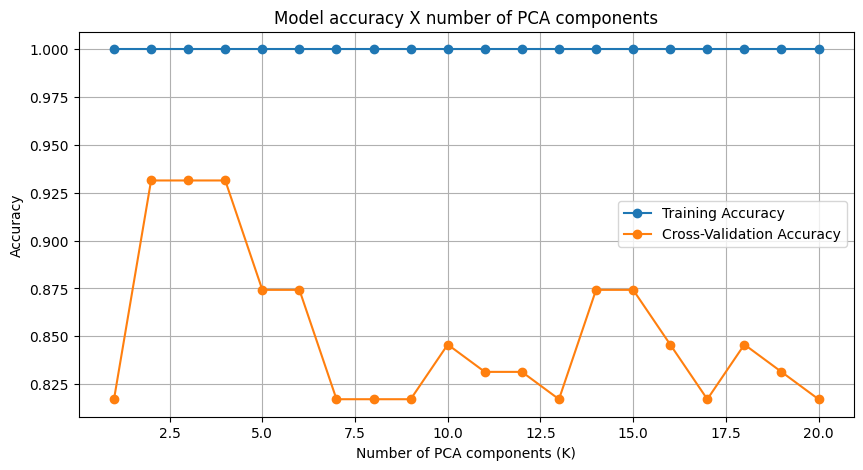


The bes model has K = 2, CV accuracy = 0.9314


In [38]:
components_range = range(1, 21)
train_accuracies = []
cv_accuracies = []
trees = []

for k in components_range:
    pca = PCA(n_components=k)
    Z = pca.fit_transform(X)
    
    tree = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    # cross validation is applied here
    cv_scores = cross_val_score(tree, Z, y, cv=5)

    train_accuracies.append(train_acc)
    cv_accuracies.append(cv_scores.mean())
    trees.append(tree)

    print(f"K={k:2d} | Train acc: {train_acc:.3f} | CV acc: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

plt.figure(figsize=(10, 5))
plt.plot(components_range, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(components_range, cv_accuracies, marker='o', label="Cross-Validation Accuracy")
plt.xlabel("Number of PCA components (K)")
plt.ylabel("Accuracy")
plt.title("Model accuracy X number of PCA components")
plt.legend()
plt.grid(True)
plt.show()

# argmax finds index of fist occurance of maximum value - occam razor is applied automatically
best_k = components_range[np.argmax(cv_accuracies)]
print(f"\nThe bes model has K = {best_k}, CV accuracy = {max(cv_accuracies):.4f}")


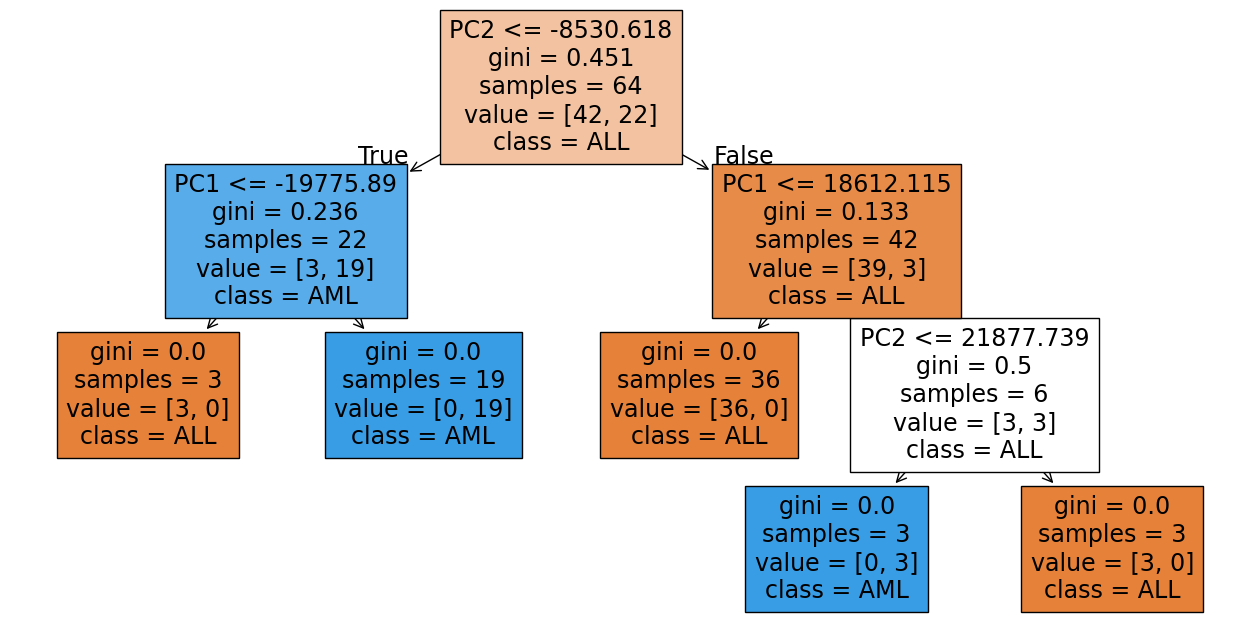

In [43]:
best_tree = trees[best_k - 1]
pca_feature_names = [f"PC{i+1}" for i in range(best_k)]

plt.figure(figsize=(16, 8))
plot_tree(
    best_tree,
    feature_names=pca_feature_names,
    class_names=["ALL", "AML"],
    filled=True
)
plt.show()


### Discussion
- Jako nejlepší byl vybrán model s  **K = 2**, který dosáhl přesnosti **0.93** při křížové validaci.
- Stejnou přesnost měly i modely s **K = 3** a **K = 4**, ale podle **Occamovy břitvy** byl zvolen nejjednodušší možný model.
- Přesnost 0.93 je poměrně vysoká a fakt, že jí dosahuje model pouze se dvěma PCA komponentami, je velmi pozitivní – model je jednoduchý a dobře interpretovatelný.
- S rostoucím **K** přesnost při křížové validaci spíše klesala – u **K = 5** již klesla pod **0.90** a u **K = 7** dokonce pod **0.85**.
- Zároveň se s rostoucím **K** zvyšovala variabilita mezi jednotlivými výpočty při křížové validaci (standardní odchylka byla vyšší).

## Part 3 (2 extra pts) 
- Extract the genes active in the discriminative components. The discriminative components are those vectors of basis-matrix V, which refer to the features your tree consists of. To extract the active genes from a component use e.g. scikit-learn K-means clustering. 
- Resulting gene-sets related to each of the discriminative component shall hopefully refer to some abstract biological processes. Use Gorilla to enrich these gene sets in Gene-ontology terms. http://cbl-gorilla.cs.technion.ac.il/ 

In [49]:
used_features = best_tree.tree_.feature
# -2 is leaf -> there is no feature
used_features = used_features[used_features != -2]

pca = PCA(n_components=best_k)
pca.fit(X)
V = pca.components_

discriminative_components = V[:, used_features]

# K-means
important_genes = set()
for i, component in enumerate(pca.components_):
    if i >= best_k:
        break
    kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
    clusters = kmeans.fit_predict(component.reshape(-1, 1))
    center_idx = np.argmax(np.abs(kmeans.cluster_centers_))
    selected = np.where(clusters == center_idx)[0]
    for idx in selected:
        gene = gene_names[idx]
        if gene != "x":
            important_genes.add(gene)

# Prepare set of all genes except 'x'
background_genes = set(g for g in gene_names if g != "x")

# Save Gorilla inputs
with open("gorilla_target.txt", "w") as f:
    for gene in sorted(important_genes):
        f.write(gene + "\n")

with open("gorilla_background.txt", "w") as f:
    for gene in sorted(background_genes):
        f.write(gene + "\n")

print("The most important genes for Gorilla (sample):")
print(", ".join(list(sorted(important_genes))[:10]), "...")
print(f"\nFile 'gorilla_target.txt': {len(important_genes)} genes")
print(f"File 'gorilla_background.txt': {len(background_genes)} genes")


The most important genes for Gorilla (sample):
ADA, AZU1, CCND3, CD24, CD74, CD79A, CD79B, CD81, CFD, CST3 ...

File 'gorilla_target.txt': 54 genes
File 'gorilla_background.txt': 5263 genes


### GOrilla output

- Nejčastěji identifikované geny byly spojovány s **aktivací buněk** a **imunitní odpovědí**, což odpovídá biologickému pozadí akutních leukémií.
- Níže je uvedeno **pět nejvýznamnějších obohacených GO termínů** podle hodnoty p-value.
- Odkaz na celou stránku výsledků: [GOrilla Result page](https://cbl-gorilla.cs.technion.ac.il/GOrilla/tfc0cwyf/GOResults.html)

| GO term     | Description                   | P-value   | FDR q-value | Enrichment (N, B, n, b)     |
|-------------|-------------------------------|-----------|-------------|------------------------------|
| GO:0002376  | immune system process         | 2.8E-13   | 3.65E-9     | 3.22 (4937, 1072, 50, 35)    |
| GO:0045321  | leukocyte activation          | 2.94E-12  | 1.92E-8     | 4.96 (4937, 478, 50, 24)     |
| GO:0001775  | cell activation               | 7.03E-12  | 3.06E-8     | 4.50 (4937, 548, 50, 25)     |
| GO:0006955  | immune response               | 3.33E-11  | 1.09E-7     | 4.69 (4937, 484, 50, 23)     |
| GO:0002252  | immune effector process       | 3.78E-11  | 9.87E-8     | 4.66 (4937, 487, 50, 23)     |

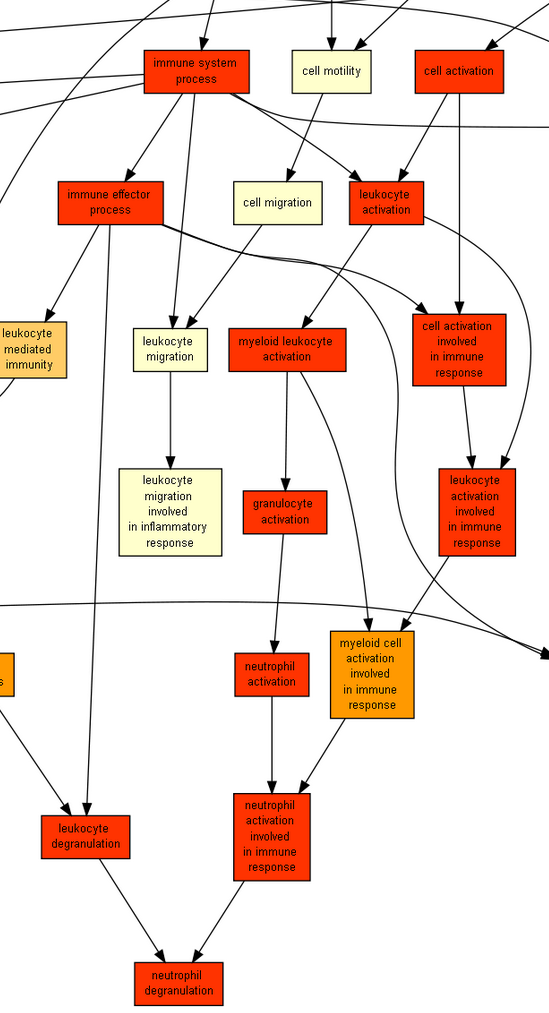  

